In [1]:
#Importing all imp libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.chdir('D:\Data Science\SPARKS FOUNDATION\Dataset TSF')

In [3]:
df=pd.read_csv('globalterrorism1.csv',encoding=("ISO-8859-1"),low_memory=False)

We were getting utf-8 Code error so we use encoding here 

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#renaming the columns according to our convinience
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended',
                   'iday':'Day','country_txt':'Country','provstate':'state',
                   'region_txt':'Region','attacktype1_txt':'AttackType',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded',
                   'summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive'
                 },inplace=True)

In [6]:
df=df[['Year','Month','Extended','Day','Country','state','Region',
       'city','latitude','longitude','AttackType',
       'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
df.shape

(181691, 19)

In [9]:
#checking for the missing values
df.isna().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [10]:
df.describe()

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# Exploratory Data Analysis

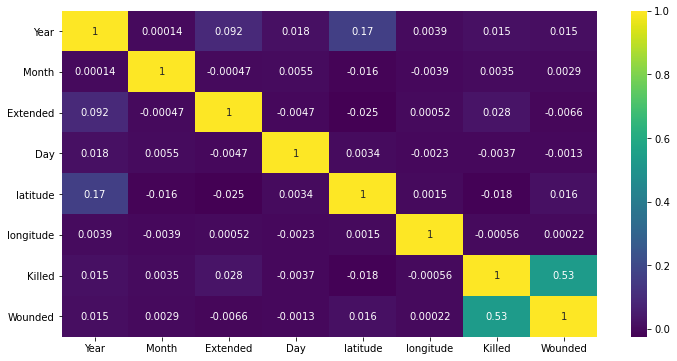

In [11]:
# correlation
dfcorr=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(dfcorr,annot=True,cmap='viridis')

In [12]:
#Number of Attacks Each Year.

year = df['Year'].unique()

years_count = df['Year'].value_counts(dropna = False).sort_index()
years_count.head()

1970    651
1971    471
1972    568
1973    473
1974    581
Name: Year, dtype: int64

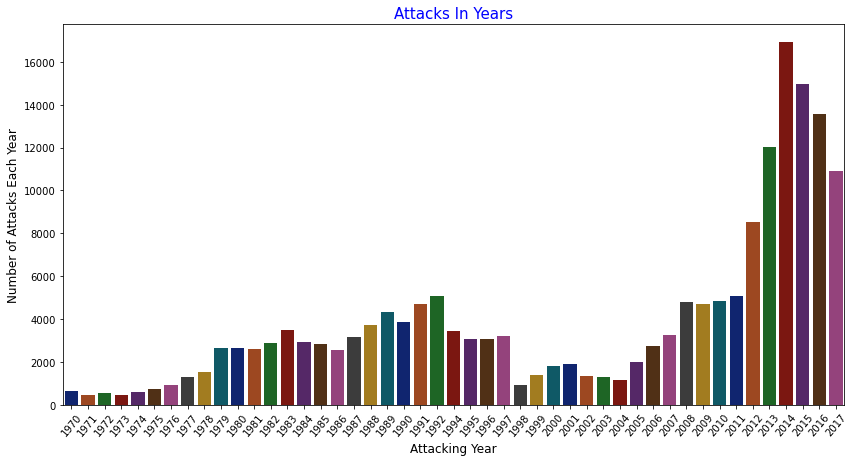

In [13]:
#plotting the graph 


plt.figure(figsize=(14,7))
sns.barplot(x = year, y = years_count, palette = "dark")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=12)
plt.ylabel('Number of Attacks Each Year',fontsize=12)
plt.title('Attacks In Years',fontsize=15,color='b')
plt.show()


From the above graph we can see that there  is highest numnber of attacks was in the year 2014,followed by 2015,2016.

In [14]:
df.head(2).T

,0,1
Year,1970,1970
Month,7,0
Extended,0,0
Day,2,0
Country,Dominican Republic,Mexico
state,NaN,Federal
Region,Central America & Caribbean,North America
city,Santo Domingo,Mexico city
latitude,18.4568,19.3719
longitude,-69.9512,-99.0866


In [15]:
#number of deaths by Terror attack

KilledData=df.loc[:,'Killed']
print('Number of Deaths by Terror Attack:', int(sum(KilledData.dropna())))


Number of Deaths by Terror Attack: 411868


In [16]:
WoundedData=df.loc[:,'Wounded']
print('Nmmber of Wounded by Terror Attack:',int(sum(WoundedData.dropna())))

Nmmber of Wounded by Terror Attack: 523869


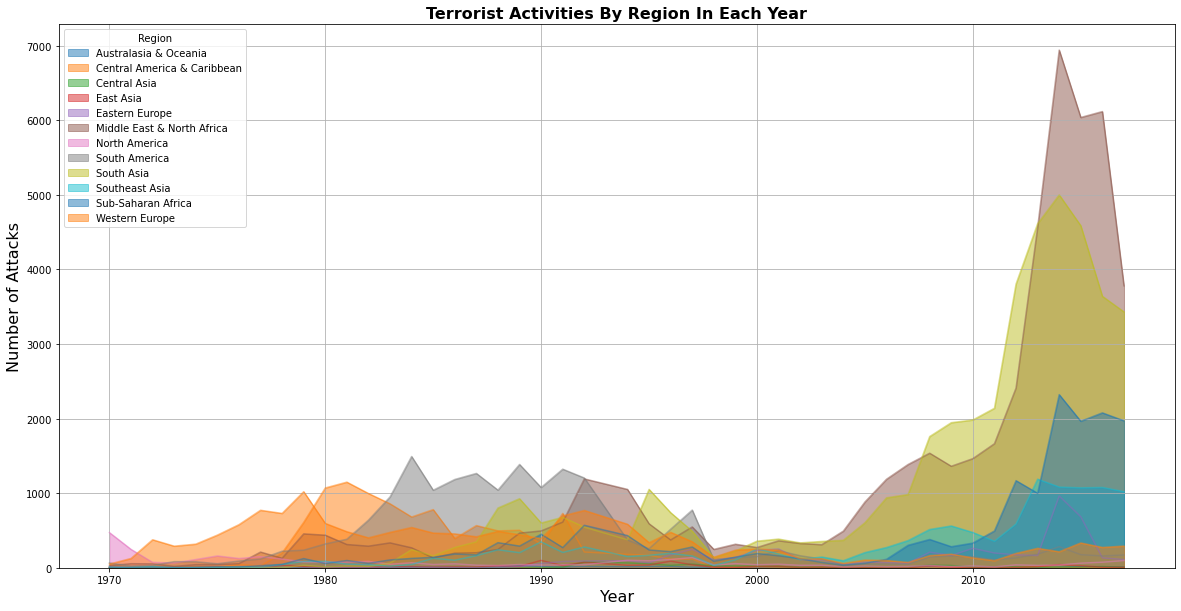

In [17]:
#Terrorist Activities by Region Each Year.

pd.crosstab(df.Year, df.Region).plot(kind='area',grid ='boolean',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontweight='bold',fontsize=16)
plt.ylabel('Number of Attacks',fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.show()



Regions with the highest number of Terrorist Attacks: Middle East & North Africa


In [18]:
attack=df.Country.value_counts()[:5]
attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

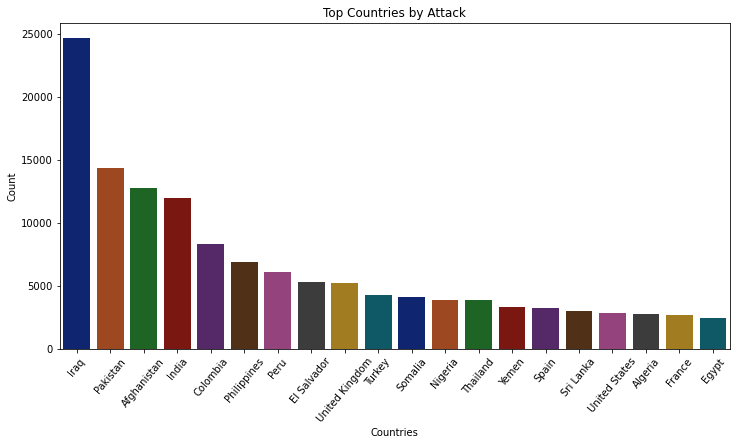

In [19]:
plt.subplots(figsize=(12,6))
sns.barplot(df['Country'].value_counts()[:20].index,
            df['Country'].value_counts()[:20].values,palette='dark')
plt.title('Top Countries by Attack')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()


Countries with the most no of attacks : Iraq followed by Pakistan and Afghanisthan.

In [20]:
df.Group.value_counts()[:5]


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64

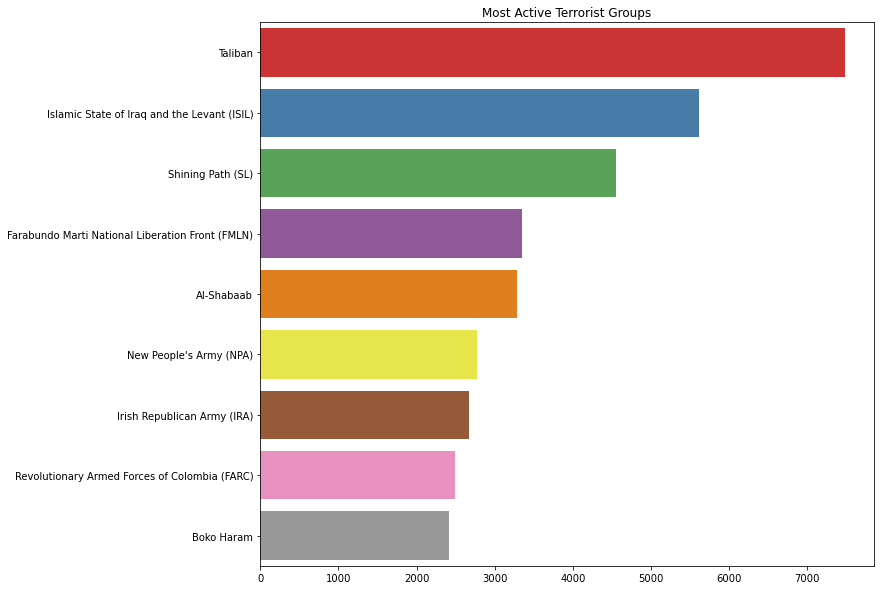

In [21]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:10].index,x=df['Group'].value_counts()[1:10].values,
           palette='Set1')
plt.title('Most Active Terrorist Groups')
plt.show()


Group with the most attacks: Taliban



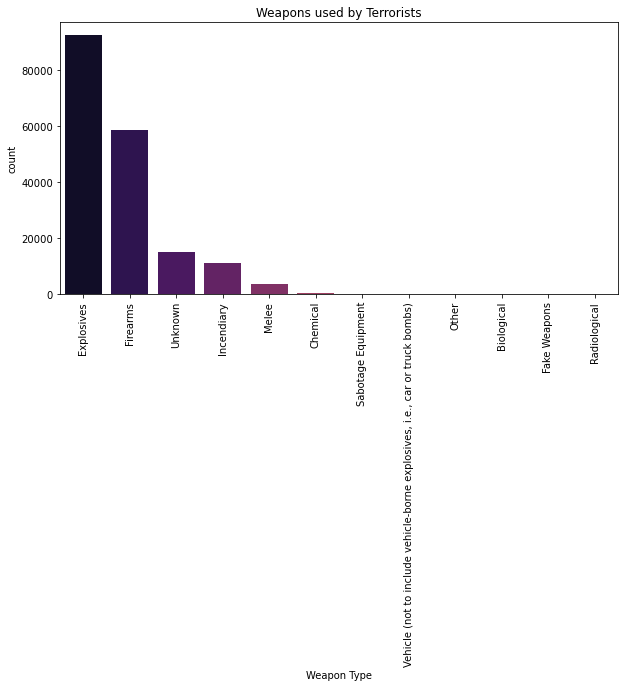

In [22]:
#Weapons Used for attack
plt.subplots(figsize=(10,5))
sns.countplot('Weapon_type',data=df,palette='inferno',order=df['Weapon_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()



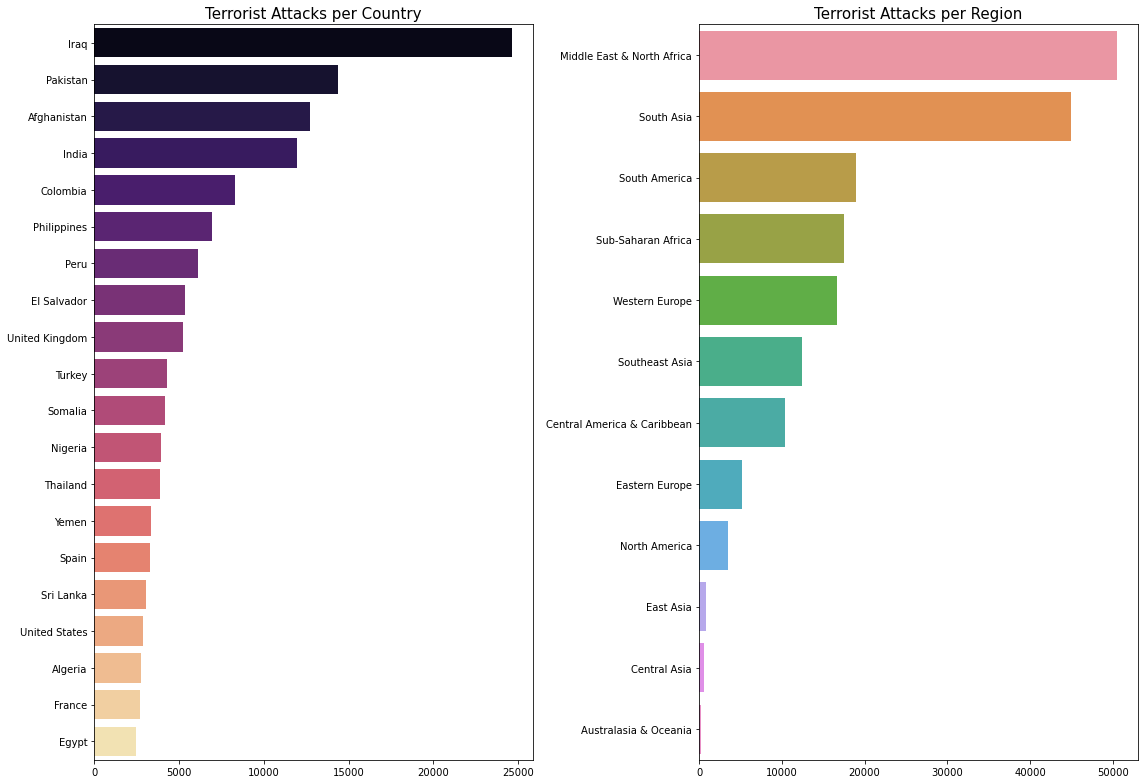

In [23]:
#Attacks by Country and Region.
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values, y = df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country', fontsize=15)
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region', fontsize=15)
fig.tight_layout()
plt.show()


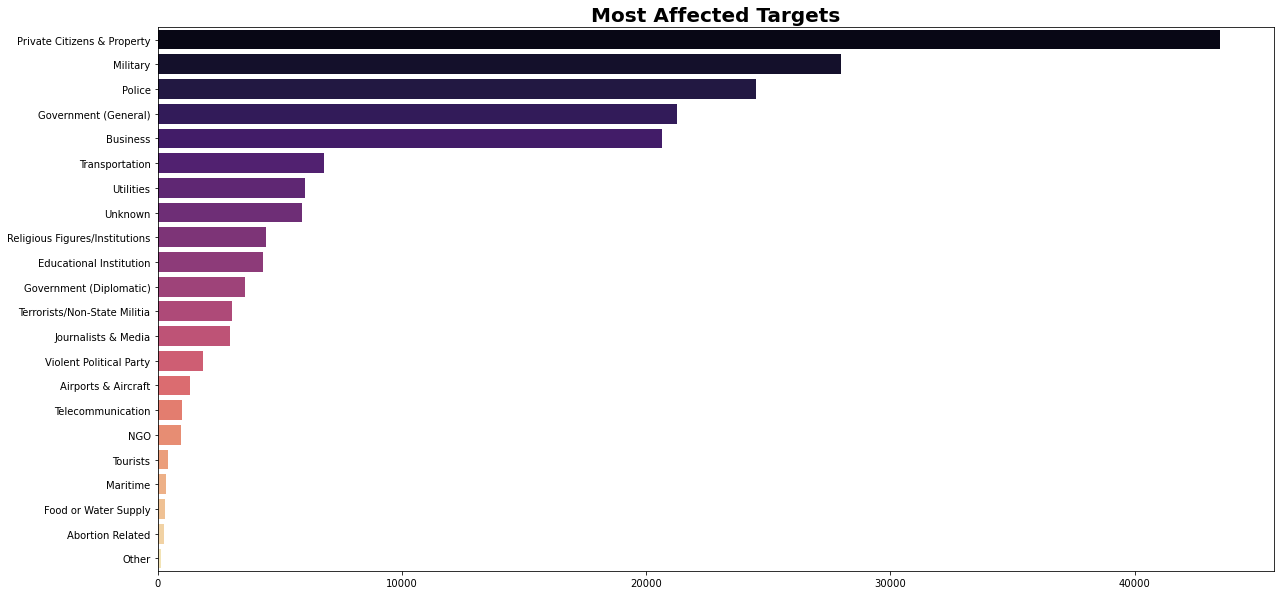

In [38]:
#Most Affected Targets 
plt.subplots(figsize=(20,10))
sns.barplot(y=df['Target_type'].value_counts().index,x=df['Target_type'].value_counts().values,
           palette='magma')
plt.title('Most Affected Targets',fontweight="bold",fontsize=20)

plt.show()


Text(0.5, 1.0, 'Number of Killed and Wounded by Attack')

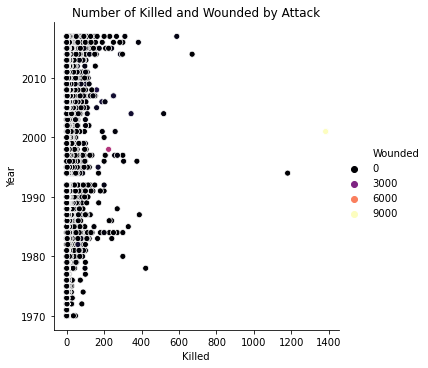

In [39]:
#Number of Killled and Wounded during attacks
sns.relplot(data=df, x="Killed", y="Year", hue="Wounded", palette='magma')
plt.title('Number of Killed and Wounded by Attack')


**Number of deaths with respect to the extended parameter that is if the people killed were involved in an encounter for more than 24 hours.**



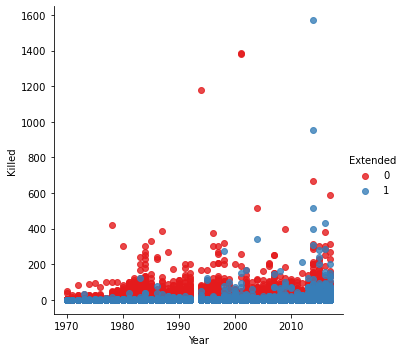

In [40]:
sns.lmplot(x='Year',y='Killed',data=df,fit_reg=False,hue='Extended',legend=True,palette="Set1")


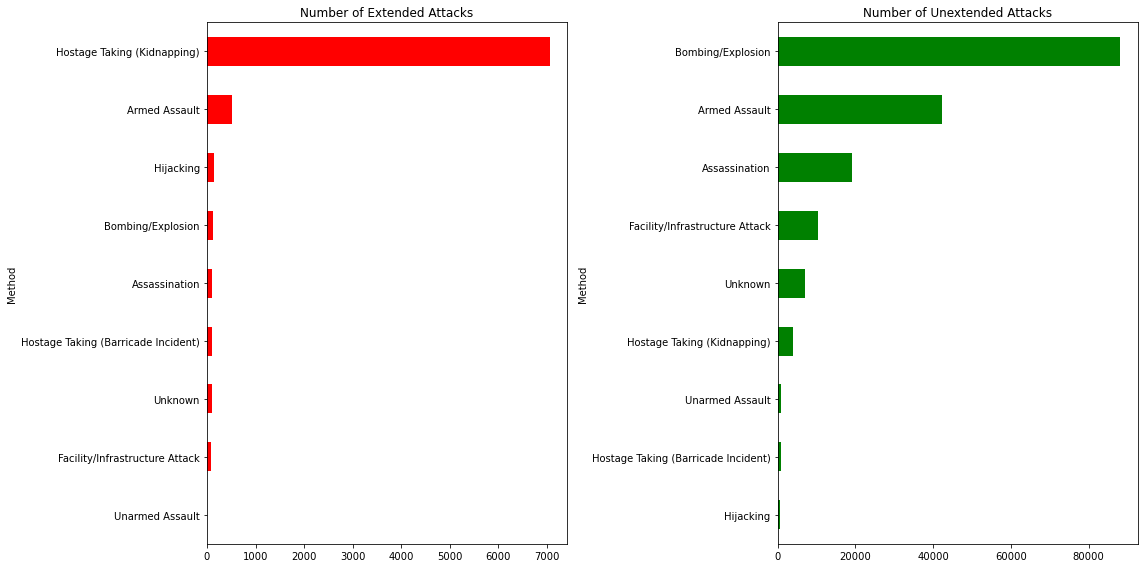

In [45]:
fig,ax = plt.subplots(figsize=(16,8),nrows=1,ncols=2)
ax[0]=df[df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='green',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()





Observation & Conclusions.
Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of Terrorist Attacks: Middle East & North Africa
Most number of deaths by a single attack is 1570 people that took place in Iraq
City with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Number of people killed by terror attack: 411868
Terrorist attacks have increased in recent years.
Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.
In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.
It is noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.
Thank You.